In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from non_param_effect_size import calc_non_param_ci, cles_ind, rbc_ind

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi

<IPython.core.display.Javascript object>

In [4]:
running = pd.read_csv("../data/running_playlist_tracks.csv")
running.drop(columns="Unnamed: 0", inplace=True)
running.head()

,id,artist,title,album,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,00GOPLxW4PGQuUYdPJh8K1,Childish Gambino,IV. Sweatpants,Because the Internet,71,0.710,0.470,1,-9.330,0,0.1420,0.15400,0.00000,0.6430,0.581,80.027,180675,4
1,00QyLmjxaSEE8qIZQjBXBj,2 Chainz,We Own It (Fast & Furious),Fast & Furious 6,62,0.554,0.899,8,-4.573,1,0.4080,0.05210,0.00000,0.0568,0.552,171.966,227893,4
2,00V7a8gzdZQgvulLe3MDe3,Elliphant,To The End,To The End,0,0.650,0.893,11,-3.340,0,0.0426,0.01300,0.00384,0.0898,0.246,115.005,259773,4
3,00ko9WaS4jOX1kEk3gvHjf,Chance the Rapper,Hot Shower,The Big Day,74,0.899,0.509,9,-8.040,1,0.3870,0.00157,0.00000,0.0573,0.599,150.001,225924,4
4,00qOE7OjRl0BpYiCiweZB2,Foreigner,Juke Box Hero,4 (Expanded),68,0.357,0.653,9,-5.554,1,0.0654,0.08280,0.00000,0.0844,0.522,176.647,259800,4


<IPython.core.display.Javascript object>

Take a sample from the larger dataset
``` python
large = pd.read_csv("../data/spotify_dataset.csv")
large.head()

gen = large.sample(n=5000)

gen.to_csv("../data/sampled_set.csv")
```

In [4]:
gen = pd.read_csv("../data/sampled_set.csv")
gen.drop(columns="Unnamed: 0", inplace=True)
gen.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.992,['Ignacio Corsini'],0.601,111333,0.1980,0,4rTjeJa5upBPcTPWtXYcJz,0.000082,6,0.3850,-19.337,0,Cuando Llora el Corazón - Remasterizado,0,1929-06-20,0.0777,122.350,0.842,1929
1,0.805,['Carole King'],0.650,186200,0.3420,0,7oEIm5uvKfOeMwilOAYb32,0.000006,4,0.0913,-11.345,1,Beautifull,41,1968,0.0289,77.093,0.558,1968
2,0.973,"['Arthur Sullivan', 'Muriel Harding', 'Neville...",0.353,242307,0.0836,0,0cc1sgKtjZtMEzH1qE9tS0,0.000001,6,0.3130,-19.784,1,The Sorcerer / Act 1: 15. Sprites of earth and...,0,1953-01-01,0.0499,89.151,0.149,1953
3,0.322,['Bill LaBounty'],0.648,265640,0.4020,0,3KH39R9cO3ZWN6hqRbTKM3,0.000001,3,0.0886,-14.972,1,This Night Won't Last Forever,30,1978-07-21,0.0241,102.682,0.607,1978
4,0.309,['The Allman Brothers Band'],0.488,259444,0.7210,0,7K4jh3V3fP00WKg7c6lwqA,0.048200,2,0.4370,-9.141,1,"Statesboro Blues - Live At Fillmore East, Marc...",23,1971-07-01,0.0617,125.940,0.786,1971


<IPython.core.display.Javascript object>

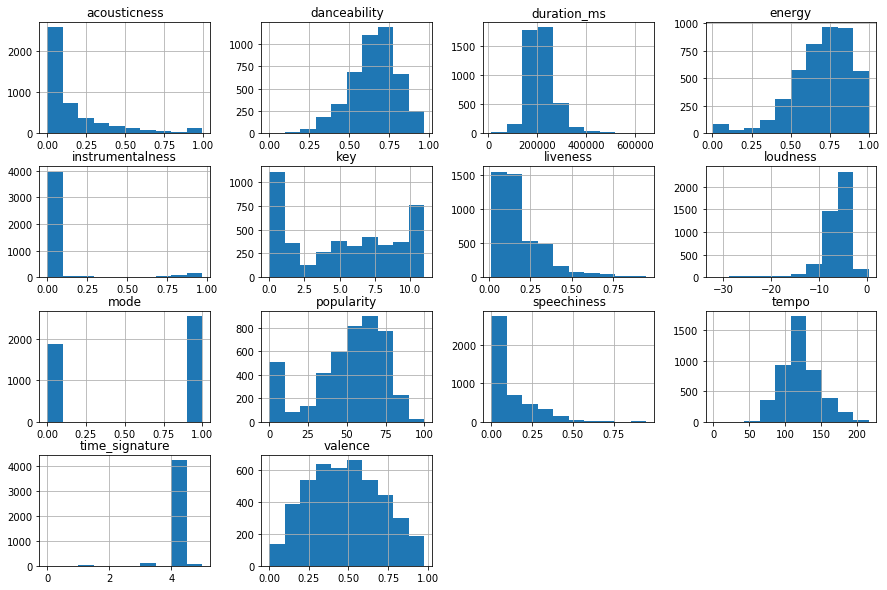

<IPython.core.display.Javascript object>

In [6]:
running.hist(figsize=(15, 10))
plt.show()

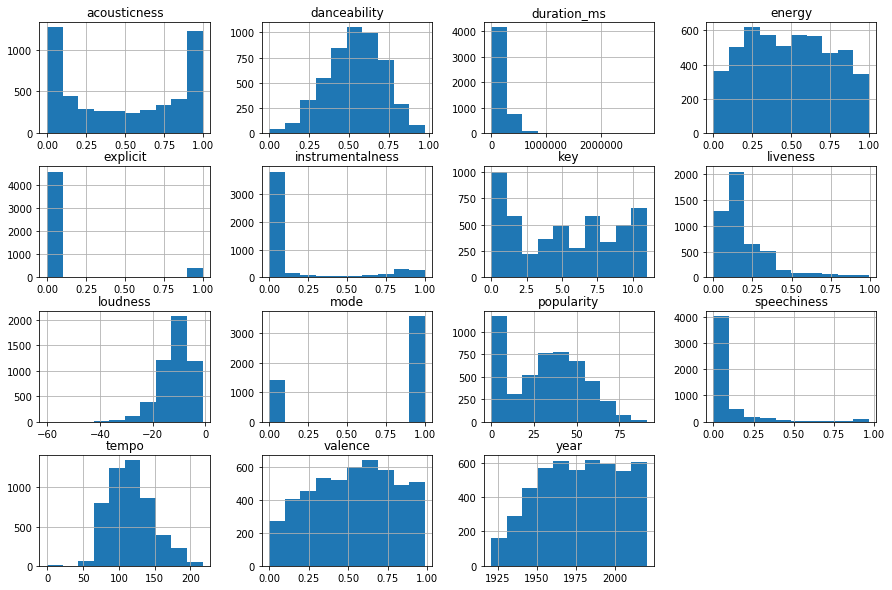

<IPython.core.display.Javascript object>

In [7]:
gen.hist(figsize=(15, 10))
plt.show()

In [8]:
# sns.pairplot(running)

<IPython.core.display.Javascript object>

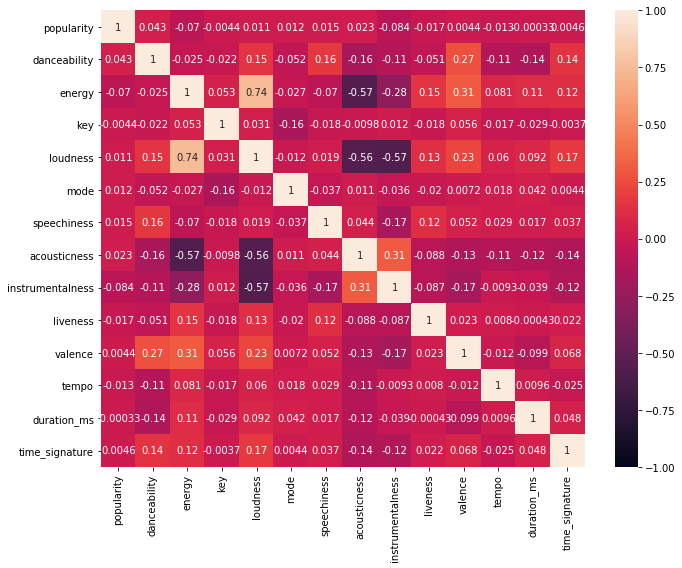

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(running.corr(), vmin=-1.0, vmax=1.0, annot=True)
plt.tight_layout()
plt.show()

Straight off the bat, the first thing I'm checking for is a tempo difference

$H_o$ : The average tempo in running playlists is the same as the general population

$H_a$ : Running playlist tempos are different than the population

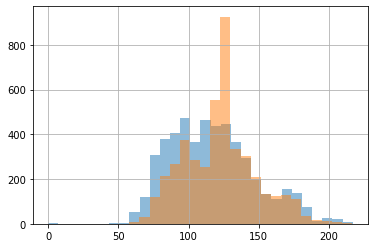

<IPython.core.display.Javascript object>

In [10]:
gen["tempo"].hist(bins=30, alpha=0.5)
running["tempo"].hist(bins=30, alpha=0.5)
plt.show()

There's a very obvious spike around 120 for running playlist songs

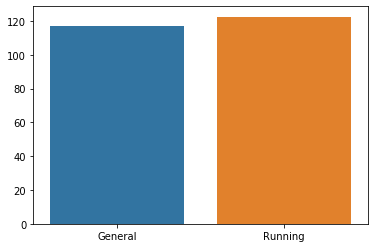

122.49224287317621

<IPython.core.display.Javascript object>

In [11]:
y = [gen["tempo"].mean(), running["tempo"].mean()]
x = ["General", "Running"]
sns.barplot(x=x, y=y)
plt.show()
running["tempo"].mean()

In [12]:
stats.ttest_ind(gen["tempo"], running["tempo"])

Ttest_indResult(statistic=-9.484947624483937, pvalue=3.013982187625835e-21)

<IPython.core.display.Javascript object>

p is less than 0.05 for a standard t-test showing we can reject the null that the average tempos are the same between the two groups

In [13]:
l, h = get_95_ci(gen["tempo"], running["tempo"])

low = gen["tempo"].mean() - l
high = gen["tempo"].mean() - h

(low, high)

(123.62841431833262, 121.3560714280198)

<IPython.core.display.Javascript object>

Optimal range of tempo is between 121.3 and 123.6

In [14]:
stats.describe(running["speechiness"])

DescribeResult(nobs=4455, minmax=(0.0, 0.951), mean=0.1244398204264871, variance=0.014372447825742332, skewness=1.844345362714322, kurtosis=4.105342790405861)

<IPython.core.display.Javascript object>

In [15]:
stats.mannwhitneyu(running["speechiness"], gen["speechiness"])

MannwhitneyuResult(statistic=7718581.5, pvalue=3.816376909633388e-147)

<IPython.core.display.Javascript object>

In [16]:
print(calc_non_param_ci(running["speechiness"], gen["speechiness"]))
print(cles_ind(running["speechiness"], gen["speechiness"]))
print(rbc_ind(running["speechiness"], gen["speechiness"]))

(0.014599999999999995, 0.017600000000000005)
0.6528769472502806
0.30697360269360274


<IPython.core.display.Javascript object>

Results show running songs are likely to have more 'speechiness' but the confidence interval is very low, making it probably unremarkable

In [17]:
stats.describe(running["danceability"])

DescribeResult(nobs=4455, minmax=(0.0, 0.971), mean=0.6555391919191919, variance=0.021799748275054088, skewness=-0.5295621160995195, kurtosis=0.16814882433718692)

<IPython.core.display.Javascript object>

I'm curious about the energy metric to test. I'm wary of this data much for the same reason I'm wary of acousticness. The distribution I have doesn't very well reflect what spotify shows on their api reference. I'm thinking I might need to resample from the set

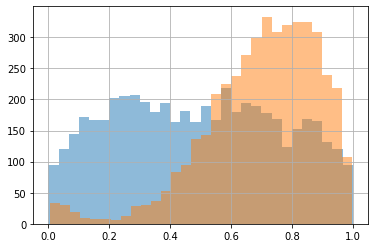

<IPython.core.display.Javascript object>

In [18]:
gen["energy"].hist(bins=30, alpha=0.5)
running["energy"].hist(bins=30, alpha=0.5)
plt.show()

In [19]:
stats.describe(running["energy"])

DescribeResult(nobs=4455, minmax=(0.00561, 0.997), mean=0.6993501571268238, variance=0.034823354923459816, skewness=-1.0478527833385225, kurtosis=1.506434259458909)

<IPython.core.display.Javascript object>

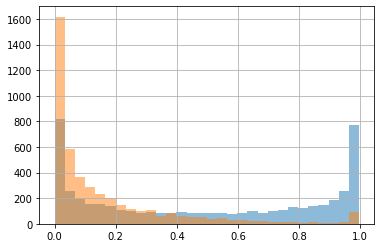

<IPython.core.display.Javascript object>

In [20]:
gen["acousticness"].hist(bins=30, alpha=0.5)
running["acousticness"].hist(bins=30, alpha=0.5)
plt.show()

In [21]:
stats.mannwhitneyu(running["acousticness"], gen["acousticness"])

MannwhitneyuResult(statistic=5726589.5, pvalue=0.0)

<IPython.core.display.Javascript object>

In [22]:
print(calc_non_param_ci(running["acousticness"], gen["acousticness"]))
print(cles_ind(running["acousticness"], gen["acousticness"]))
print(rbc_ind(running["acousticness"], gen["acousticness"]))

(-0.33399999999999996, -0.291)
0.742636632996633
0.4858281032547699


<IPython.core.display.Javascript object>

Looking at the samples from this set, it would appear to be fairly definitive that making an acoustic track is a very bad idea but I'm a little concerned about it because in the api documentation([here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)) the plot for the general population is very different than what they show

Valence is a measure of positivity or happiness of a track. Closer to 1 means more positive

$H_o$ : Running playlist valences are the same as the population

$H_a$ : Running playlist valences are different than the population

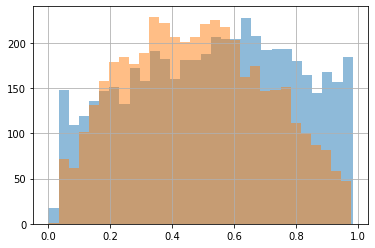

<IPython.core.display.Javascript object>

In [23]:
gen["valence"].hist(bins=30, alpha=0.5)
running["valence"].hist(bins=30, alpha=0.5)
plt.show()

Looking at the distributions, it appears that running songs are less happy than the population

In [24]:
# check for normality
print(stats.describe(gen["valence"]))
print(stats.describe(running["valence"]))

DescribeResult(nobs=5000, minmax=(0.0, 0.984), mean=0.5300693280000001, variance=0.06850174344963834, skewness=-0.12409209967838768, kurtosis=-1.0387476268367954)
DescribeResult(nobs=4455, minmax=(0.0, 0.979), mean=0.4798855667789001, variance=0.05122042288772875, skewness=0.12503156096502394, kurtosis=-0.841613763018974)


<IPython.core.display.Javascript object>

Kurtosis is a little high for the population but still within range of being able to call it normal. Time for a t-test

In [25]:
_, p = stats.ttest_ind(gen["valence"], running["valence"])
reject = p < 0.05
reject

True

<IPython.core.display.Javascript object>

p is low enough for us to reject the null. Let's see how different they are

In [26]:
get_95_ci(gen["valence"], running["valence"])

(0.04034510047442072, 0.06002242196778265)

<IPython.core.display.Javascript object>

On average, running songs are between 0.04 and 0.06 points lower than the population. This doesn't exactly imply that the sadder or angrier the song, the better it is for running but I think it's safe to say you can avoid making very happy songs if you want to appear on more running playlists

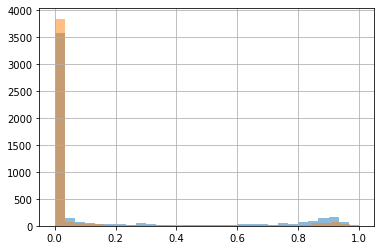

<IPython.core.display.Javascript object>

In [27]:
gen["instrumentalness"].hist(bins=30, alpha=0.5)
running["instrumentalness"].hist(bins=30, alpha=0.5)
plt.show()

In [28]:
gen.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.992,['Ignacio Corsini'],0.601,111333,0.1980,0,4rTjeJa5upBPcTPWtXYcJz,0.000082,6,0.3850,-19.337,0,Cuando Llora el Corazón - Remasterizado,0,1929-06-20,0.0777,122.350,0.842,1929
1,0.805,['Carole King'],0.650,186200,0.3420,0,7oEIm5uvKfOeMwilOAYb32,0.000006,4,0.0913,-11.345,1,Beautifull,41,1968,0.0289,77.093,0.558,1968
2,0.973,"['Arthur Sullivan', 'Muriel Harding', 'Neville...",0.353,242307,0.0836,0,0cc1sgKtjZtMEzH1qE9tS0,0.000001,6,0.3130,-19.784,1,The Sorcerer / Act 1: 15. Sprites of earth and...,0,1953-01-01,0.0499,89.151,0.149,1953
3,0.322,['Bill LaBounty'],0.648,265640,0.4020,0,3KH39R9cO3ZWN6hqRbTKM3,0.000001,3,0.0886,-14.972,1,This Night Won't Last Forever,30,1978-07-21,0.0241,102.682,0.607,1978
4,0.309,['The Allman Brothers Band'],0.488,259444,0.7210,0,7K4jh3V3fP00WKg7c6lwqA,0.048200,2,0.4370,-9.141,1,"Statesboro Blues - Live At Fillmore East, Marc...",23,1971-07-01,0.0617,125.940,0.786,1971


<IPython.core.display.Javascript object>